In [1]:
import pandas as pd
import plotly.express as px

In [2]:
route = pd.read_csv("../scripts/data/routes.txt")
trip = pd.read_csv("../scripts/data/trips.txt")
shapes = pd.read_csv("../scripts/data/shapes.txt")


In [3]:
ls ../scripts/data/*txt

../scripts/data/agency.txt          ../scripts/data/stop_times.txt
../scripts/data/calendar.txt        ../scripts/data/stops.txt
../scripts/data/calendar_dates.txt  ../scripts/data/transfers.txt
../scripts/data/routes.txt          ../scripts/data/trips.txt
../scripts/data/shapes.txt


In [4]:
features = [
    'timestamp', 'line_id', 'direction', 'journey_id',
    'time_frame', 'vehicle_journey_id', 'operator',
    'congestion', 'lng', 'lat', 'delay', 'block_id',
    'vehicle_id', 'stop_id', 'a']
df = pd.read_csv("../scripts/data/siri.20130107.csv.gz", names=features)

In [5]:
df1 = df[df["journey_id"]=="00010001"]

In [6]:
df1[df1["lat"] == df1["lat"].min()][["lat","lng"]]

,lat,lng
607426,53.324017,-6.212133
853970,53.324017,-6.211900


In [7]:
import osmnx as ox

In [8]:
 province = ox.geocode_to_gdf("Dublin, Irland")

In [9]:
province.head()

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((-6.38703 53.34081, -6.38658 53.33867...",53.410542,53.298734,-6.114883,-6.387026,281438803,relation,1109531,53.349764,-6.260273,"Dublin, County Dublin, Leinster, Ireland",boundary,administrative,0.81159


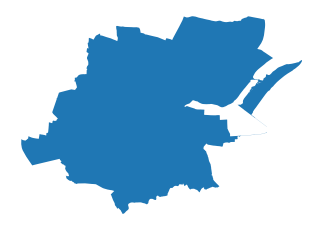

In [10]:
ax = ox.project_gdf(province).plot()
_ = ax.axis('off')

/usr/local/lib/python3.7/site-packages/osmnx/utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.7/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.7/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


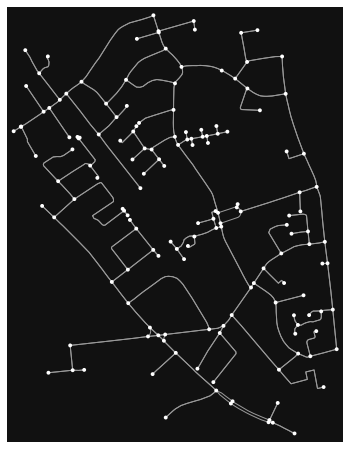

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [13]:
G = ox.graph_from_point((53.324017, -6.211900), dist=750, network_type='drive')
ox.plot_graph(G)

In [15]:
def save_graph_shapefile_directional(G, filepath=None, encoding="utf-8"):
    # default filepath if none was provided
    if filepath is None:
        filepath = os.path.join(ox.settings.data_folder, "graph_shapefile")

    # if save folder does not already exist, create it (shapefiles
    # get saved as set of files)
    if not filepath == "" and not os.path.exists(filepath):
        os.makedirs(filepath)
    filepath_nodes = os.path.join(filepath, "nodes.shp")
    filepath_edges = os.path.join(filepath, "edges.shp")

    # convert undirected graph to gdfs and stringify non-numeric columns
    gdf_nodes, gdf_edges = ox.utils_graph.graph_to_gdfs(G)
    gdf_nodes = ox.io._stringify_nonnumeric_cols(gdf_nodes)
    gdf_edges = ox.io._stringify_nonnumeric_cols(gdf_edges)
    # We need an unique ID for each edge
    gdf_edges["fid"] = np.arange(0, gdf_edges.shape[0], dtype='int')
    # save the nodes and edges as separate ESRI shapefiles
    gdf_nodes.to_file(filepath_nodes, encoding=encoding)
    gdf_edges.to_file(filepath_edges, encoding=encoding)

In [18]:

import time
#from shapely.geometry import Polygon
import os
import numpy as np

save_graph_shapefile_directional(G, filepath='./network-new')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.


In [29]:
!pip uninstall -y fmm

Found existing installation: FMM 0.12
Uninstalling FMM-0.12:
  Successfully uninstalled FMM-0.12


In [24]:
from fmm import Network
#FastMapMatch,Network,NetworkGraph,UBODTGenAlgorithm,UBODT,FastMapMatchConfig

### Read network data

network = Network("network-new/edges.shp","fid","u","v")
print ("Nodes {} edges {}".format(network.get_node_count(),network.get_edge_count()))
graph = NetworkGraph(network)

ImportError: cannot import name 'Network' from 'fmm' (/usr/local/lib/python3.7/site-packages/fmm.py)

In [25]:
import fmm

In [ ]:
fmm.